# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor



In [2]:
df = pd.read_csv('CarDekho.csv')
df

,Column1,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


# Understanging Data

In [3]:
df.head()

,Column1,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.tail()

,Column1,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [5]:
df.shape

(15411, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Column1            15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


# CHECKING MISSING VALUES

In [7]:
df.isna().sum()

Column1              0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

# Data Preprocessing

In [8]:
#Drop the irrelevant columns
df.drop(columns = ['Column1'], axis = 1, inplace= True)

#Verify the new structure
print("Irrelevant columns dropped successfully!")
print("Remaining columns:", df.columns.tolist())

Irrelevant columns dropped successfully!
Remaining columns: ['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [9]:
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [10]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [11]:
numerical_features = df.select_dtypes(exclude= 'object').columns
categorical_features = df.select_dtypes(include= 'object').columns

In [12]:
numerical_features

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [13]:
categorical_features

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

# Descriptive Statistics

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_age,15411.0,6.036338,3.013291,0.0,4.0,6.00,8.0,29.00
km_driven,15411.0,55616.480631,51618.548422,100.0,30000.0,50000.00,70000.0,3800000.00
mileage,15411.0,19.701151,4.171265,4.0,17.0,19.67,22.7,33.54
engine,15411.0,1486.057751,521.106696,793.0,1197.0,1248.00,1582.0,6592.00
max_power,15411.0,100.588254,42.972979,38.4,74.0,88.50,117.3,626.00
seats,15411.0,5.325482,0.807628,0.0,5.0,5.00,5.0,9.00
selling_price,15411.0,774971.116410,894128.363263,40000.0,385000.0,556000.00,825000.0,39500000.00


# DATA VISUALIZATION

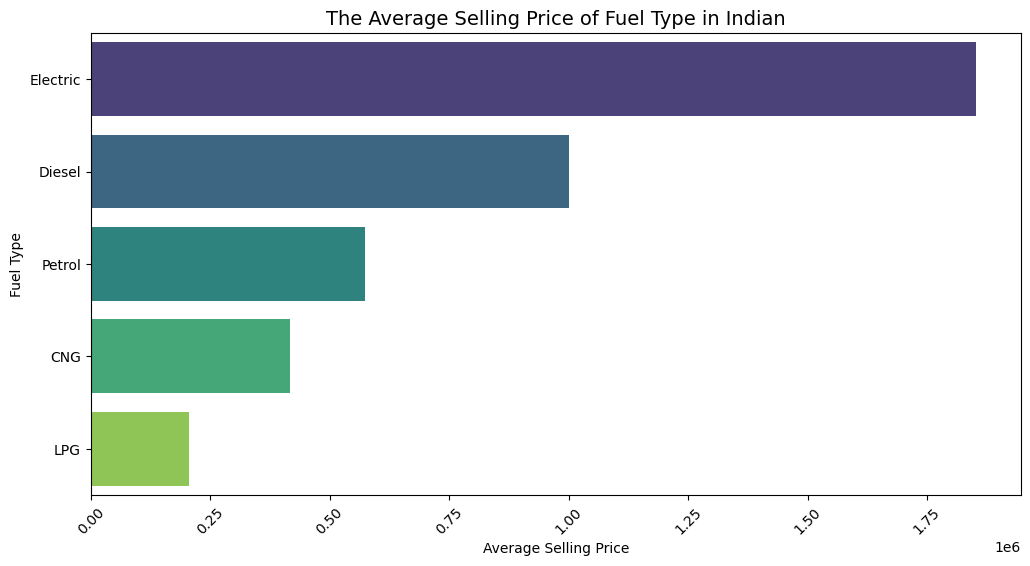

In [15]:
plt.figure(figsize=(12,6))
avg_fuel_type = df.groupby('fuel_type')['selling_price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_fuel_type.values, y=avg_fuel_type.index, palette='viridis')
plt.title('The Average Selling Price of Fuel Type in Indian', fontsize=14)
plt.xlabel('Average Selling Price')
plt.ylabel('Fuel Type')
plt.xticks(rotation=45)
plt.show()

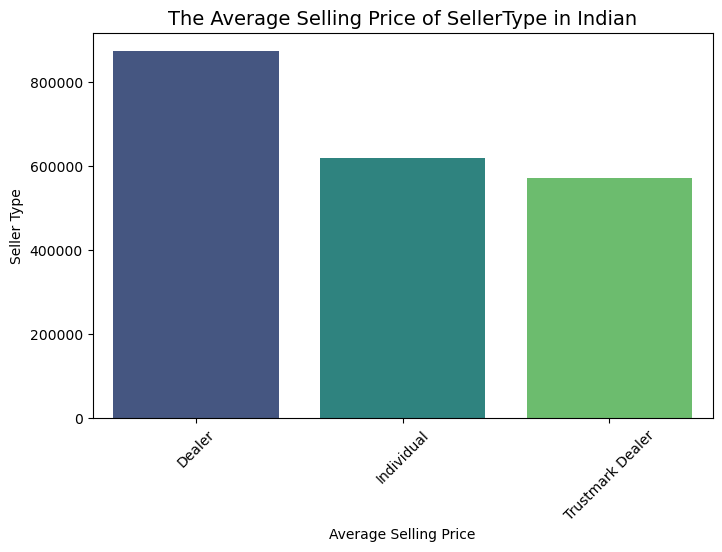

In [16]:
plt.figure(figsize=(8,5))
avg_seller_type = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_seller_type.index, y=avg_seller_type.values, palette='viridis')
plt.title('The Average Selling Price of SellerType in Indian', fontsize=14)
plt.xlabel('Average Selling Price')
plt.ylabel('Seller Type')
plt.xticks(rotation=45)
plt.show()

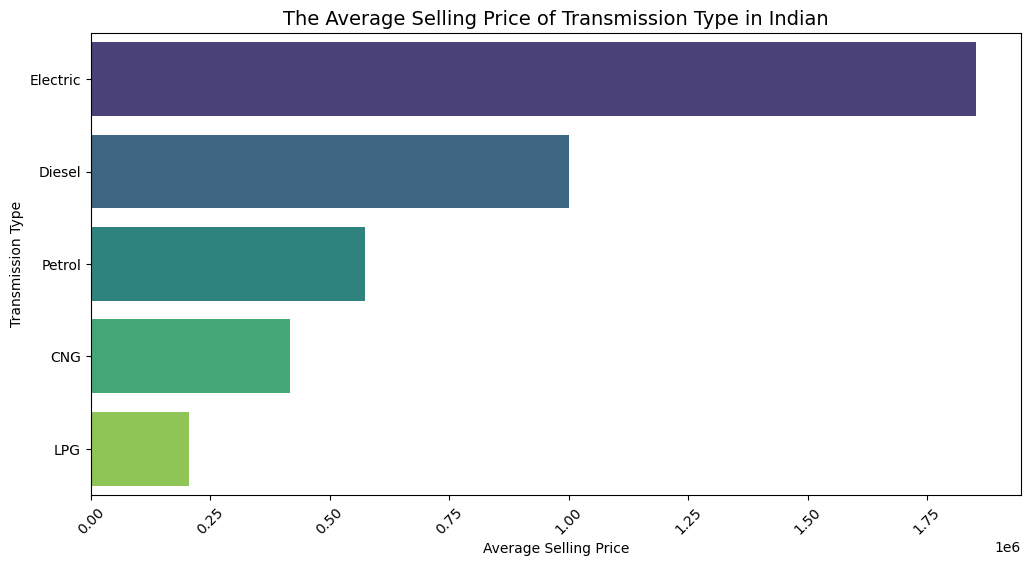

In [17]:
plt.figure(figsize=(12,6))
avg_transmission_type = df.groupby('fuel_type')['selling_price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_transmission_type.values, y=avg_transmission_type.index, palette='viridis')
plt.title('The Average Selling Price of Transmission Type in Indian', fontsize=14)
plt.xlabel('Average Selling Price')
plt.ylabel('Transmission Type')
plt.xticks(rotation=45)
plt.show()

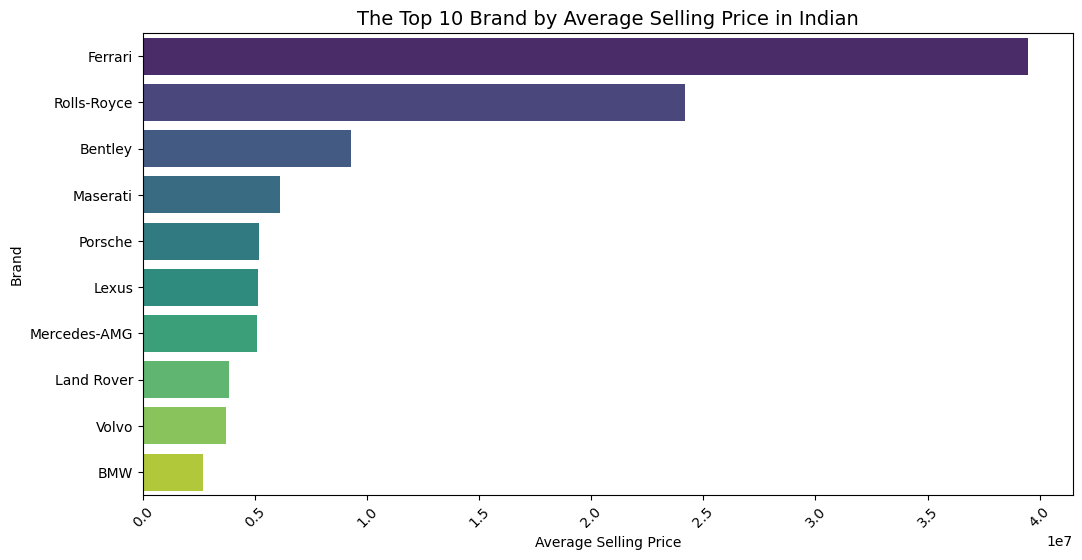

In [18]:
plt.figure(figsize=(12,6))
avg_brand = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_brand.values, y=avg_brand.index, palette='viridis')
plt.title('The Top 10 Brand by Average Selling Price in Indian', fontsize=14)
plt.xlabel('Average Selling Price')
plt.ylabel('Brand')
plt.xticks(rotation=45)
plt.show()

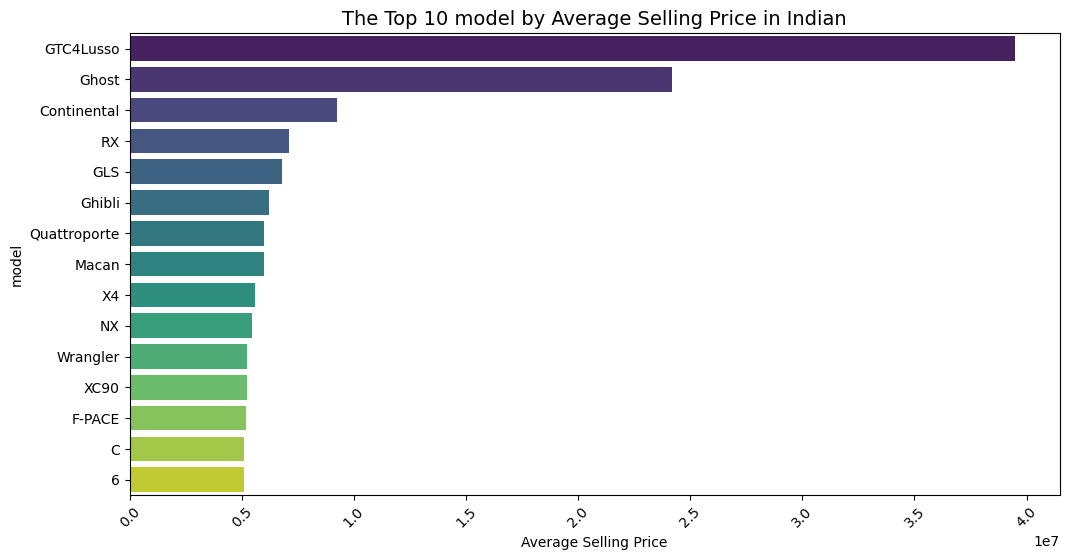

In [19]:
plt.figure(figsize=(12,6))
avg_model = df.groupby('model')['selling_price'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_model.values, y=avg_model.index, palette='viridis')
plt.title('The Top 10 model by Average Selling Price in Indian', fontsize=14)
plt.xlabel('Average Selling Price')
plt.ylabel('model')
plt.xticks(rotation=45)
plt.show()

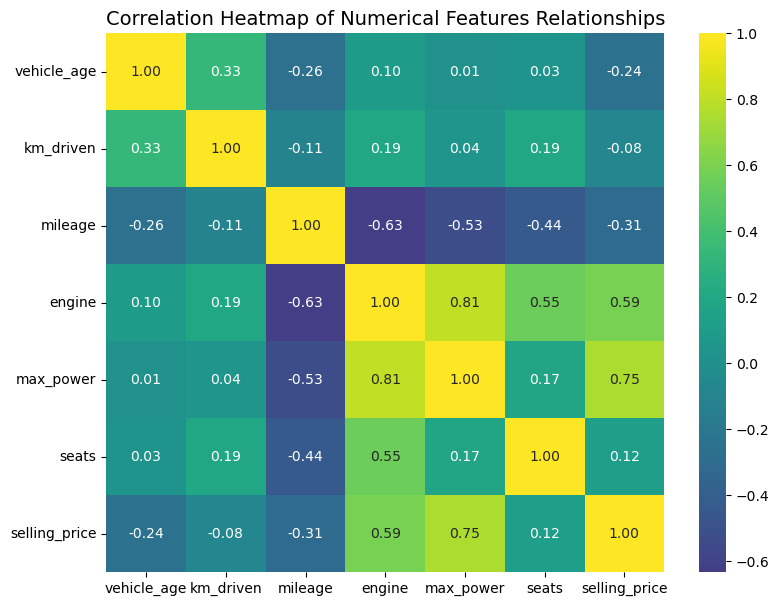

In [20]:
#Correlation Heatmap
plt.figure(figsize=(9,7))
corr = df.corr (numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', center=0)
plt.title('Correlation Heatmap of Numerical Features Relationships', fontsize= 14)
plt.show()

# FEATURE SELECTION

In [21]:
df_model = df.copy()
df_model.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# FEATURE ENGINEERING

In [22]:
df_model.drop(['brand', 'model'], axis=1, inplace=True)

In [23]:
#One hot Encoding  Categorical Features
df_model=pd.get_dummies(df_model,dtype=int)

In [24]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Columns: 138 entries, vehicle_age to transmission_type_Manual
dtypes: float64(2), int32(131), int64(5)
memory usage: 8.5 MB


In [25]:
# Independent and Dependent Variables
x = df_model.drop(columns=['selling_price'])
y = df_model['selling_price']

# TRAIN TEST SPLIT

In [26]:
# Split the Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

# SCALER

In [27]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(x_test)

# MODEL SELECTION

In [28]:
# Create a function to Evaluate Model

def evaluate_model(y_test, y_pred) :
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_square = r2_score(y_test, y_pred)
    return mae, rmse, r2_square

In [29]:
# Beginning Model Training

models = {
    "Lasso": Lasso(),
    'Elasticnet': ElasticNet(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

results = []

for name, model in models.items():
    model.fit(x_scaled, y_train)
    
# Make Prediction
    y_pred = model.predict(test_scaled)
    mae, rmse, r2 = evaluate_model(y_test, y_pred)

# Store result
    results.append({
        'Model': name,
        'MAE': mae, 
        'RMSE': rmse, 
        'R2': r2, 
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2', ascending= False)
results_df
        

,Model,MAE,RMSE,R2
4,Random Forest Regressor,99984.417149,219660.042589,0.935904
2,Gradient Boosting,128913.939183,247623.678500,0.918545
3,XGBRegressor,100771.489729,249650.973114,0.917206
0,Lasso,180678.127175,405365.979320,0.781714
1,Elasticnet,190564.622050,448233.364855,0.733106


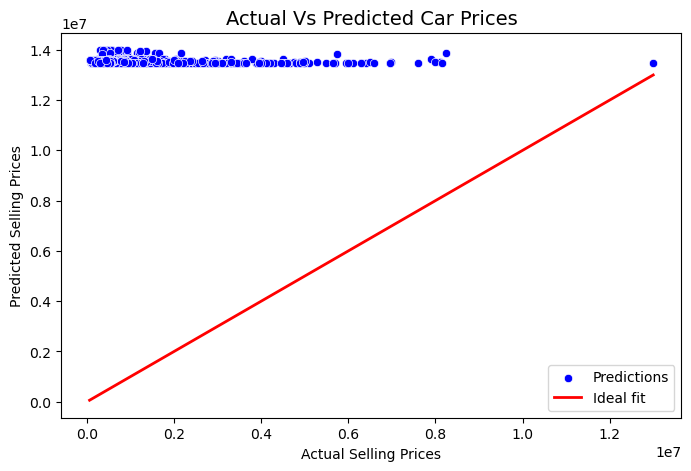

In [31]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

y_pred_best = best_model.predict(x_test) 
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_best, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal fit')
plt.title('Actual Vs Predicted Car Prices', fontsize=14)
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.legend()
plt.show()